   # Predicting Car Prices

The purpose of this project is to better understand the dataset of different variables of various cars

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99


In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cardata = pd.read_csv("imports-85.data", names = cols)
cardata.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Note: There are no category names for the colomns in the  dataset. we can create a header for the dataset from the information from the website. 

In [4]:
cardata_num = cardata[ [ 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
        'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']] 

cardata_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


The above columns are the numeric and can be used as features. the price will be the target column. 

# Data Cleaning 

In [5]:
cardata_num = cardata_num.replace("?", np.nan)
cardata_num


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,NaN


In [6]:
cardata_num = cardata_num.astype(float)

In the normalized losses column, the results with the "?" were replaces with nan and the entire column was transfored into float type. 

In [7]:
cardata_num.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
cardata_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [9]:
cardata_num = cardata_num.dropna(subset = ["price"])

In [10]:
cardata_num.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [11]:
cardata_num = cardata_num.fillna(cardata_num.mean())

In [12]:
cardata_num.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In order for us to be able to apply the k-nearset algorithm we have to remove alll of the null values. We removed the entire normalized losses column because there are too many null values and it is not very helpful in our analysis. We also removed the rows with null values from the remaning columns. 

In [13]:
cardata_norm = ((cardata_num-cardata_num.min())/(cardata_num.max()-cardata_num.min()))
cardata_norm["price"] = cardata_num["price"]
cardata_norm.head()
cardata_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    201 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
engine-size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


We will also normalize all of the results except the price column

# Unitvariate K-nearest neighbors 

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import statistics

In [15]:
def knn_train_test (train_col, tar_col, dfo):    
    np.random.seed(1)
    dfo2 = np.random.permutation(dfo.index)
    dfo = dfo.reindex(dfo2)
    
    splitn = round(len(dfo.index)/2)
    splitn = int(splitn)

    train = dfo.iloc[0:splitn]
    test = dfo.iloc[splitn:]

    knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto', metric='euclidean')
    knn.fit(train[[train_col]], train[[tar_col]])
    test1 = knn.predict(test[[train_col]])

    rmse = (mean_squared_error(test[tar_col], test1))**(1/2)
    return(rmse)


In [16]:
a =[]
rmse_results = {}
train_data = cardata_norm.drop(columns = "price")
for col in train_data.columns:
     rmse_val = knn_train_test(col,"price", cardata_norm )
     rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The engine size value preformed the best because it has the lowest number 


In [74]:
def knn_train_test_k (train_col, tar_col, dfo):    
    np.random.seed(1)
    dfo2 = np.random.permutation(dfo.index)
    dfo = dfo.reindex(dfo2)
    
    splitn = round(len(dfo.index)/2)
    splitn = int(splitn)

    train = dfo.iloc[0:splitn]
    test = dfo.iloc[splitn:]

    k_fixed = [1,3,5,7,9]
    rmse_k = {}
    for i in k_fixed:
        knn = KNeighborsRegressor(n_neighbors=i, algorithm='auto', metric='euclidean')
        knn.fit(train[[train_col]], train[[tar_col]])
        test1 = knn.predict(test[[train_col]])

        rmse = (mean_squared_error(test[tar_col], test1))**(1/2)
        rmse_k[i] = rmse
    return(rmse_k)
            
rmse_k_results = {}
train_data = cardata_norm.drop(columns = "price")

for col in train_data.columns:
    rmse_val = knn_train_test_k(col,"price", cardata_norm)
    rmse_k_results[col] = rmse_val

rmse_k_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

These are the results when you switch the k value with 1,3,5,7,9

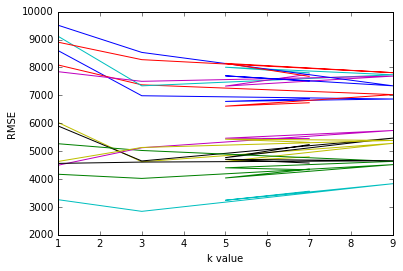

In [79]:
import matplotlib.pyplot as plt 
%matplotlib inline
x = []
y = []


for k,v in rmse_k_results.items():
    x.append(list(v.keys()))
    y.append(list(v.values()))
for i in range(0,14):    
    plt.plot(x[i],y[i])
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

# Multivariate k-neigherest neighbours

In [80]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in rmse_k_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [81]:
def knn_train_test_multi(train_cols, tar_col, dfo):    
    np.random.seed(1)
    dfo2 = np.random.permutation(dfo.index)
    dfo = dfo.reindex(dfo2)
    
    splitn = round(len(dfo.index)/2)
    splitn = int(splitn)

    train = dfo.iloc[0:splitn]
    test = dfo.iloc[splitn:]

    k_fixed = [5]
    rmse_k = {}
    for i in k_fixed:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train[train_cols], train[tar_col])
        test1 = knn.predict(test[train_cols])

        rmse = (mean_squared_error(test[tar_col], test1))**(1/2)
        rmse_k[i] = rmse
    return(rmse_k)
            

rmse_k_results = {}

#for nr_best_feats in range(2,7):
#    k_rmse_results['{} best features'.format(nr_best_feats)] = 
    
rmse_k_results[2] = knn_train_test_multi(sorted_features[:2],'price',cardata_norm)
rmse_k_results[3] =knn_train_test_multi(sorted_features[:3],'price',cardata_norm)
rmse_k_results[4] =knn_train_test_multi(sorted_features[:4],'price',cardata_norm)
rmse_k_results[5] =knn_train_test_multi(sorted_features[:5],'price',cardata_norm)
  

rmse_k_results



{2: {5: 2949.8817277180374},
 3: {5: 3580.7376651928435},
 4: {5: 3487.340917327035},
 5: {5: 3410.2170133901805}}

# Hyperparameters

In [82]:
def knn_train_test_hype(train_cols, tar_col, dfo):    
    np.random.seed(1)
    dfo2 = np.random.permutation(dfo.index)
    dfo = dfo.reindex(dfo2)
    
    splitn = round(len(dfo.index)/2)
    splitn = int(splitn)

    train = dfo.iloc[0:splitn]
    test = dfo.iloc[splitn:]

    k_fixed  = []
    for i in range(1,26):
        k_fixed.append(i)
        
    rmse_k = {}
    for i in k_fixed:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train[train_cols], train[tar_col])
        test1 = knn.predict(test[train_cols])

        rmse = (mean_squared_error(test[tar_col], test1))**(1/2)
        rmse_k[i] = rmse
    return(rmse_k)
            

rmse_k_results_m = {}
    

rmse_k_results_m[3] =knn_train_test_hype(sorted_features[:3],'price',cardata_norm)


rmse_k_results_m



{3: {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.225713011904,
  16: 4408.838883583756,
  17: 4404.781029718083,
  18: 4447.577705091259,
  19: 4537.049753345422,
  20: 4592.444230865941,
  21: 4636.731219491763,
  22: 4721.248544133379,
  23: 4787.943506313775,
  24: 4802.894378990491,
  25: 4816.708120139092}}

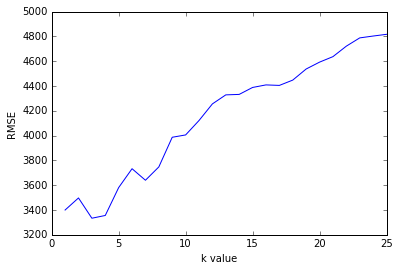

In [97]:
import matplotlib.pyplot as plt 
%matplotlib inline

for k,v in rmse_k_results_m.items():
    x = list(v.keys())
    y =list(v.values())
    plt.plot(x,y, label="{}".format(k))
#for i in range(0,25):    
plt.plot(x[0],y[0])
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()
